In [9]:
top_directory = '/Users/iaincarmichael/Dropbox/Research/law/law-net/'

from __future__ import division

import os
import sys
import time
from math import *
import copy
import cPickle as pickle

# data
import numpy as np
import pandas as pd

# viz
import matplotlib.pyplot as plt


# graph
import igraph as ig


# NLP
from nltk.corpus import stopwords


# our code
sys.path.append(top_directory + 'code/')
from load_data import load_and_clean_graph, case_info
from pipeline.download_data import download_bulk_resource
from pipeline.make_clean_data import *
from viz import print_describe


sys.path.append(top_directory + 'explore/vertex_metrics_experiment/code/')
from make_snapshots import *
from make_edge_df import *
from attachment_model_inference import *
from compute_ranking_metrics import *
from pipeline_helper_functions import *
from make_case_text_files import *
from bag_of_words import *
from similarity_matrix import *

# directory set up
data_dir = top_directory + 'data/'
experiment_data_dir = data_dir + 'vertex_metrics_experiment/'

court_name = 'scotus'

# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
G = load_and_clean_graph(data_dir, court_name)

In [11]:
active_years = range(1900, 2015 + 1)

In [12]:
seed_ranking = 4343

R = 1000

In [57]:
results = pd.DataFrame(columns = ['mean_score', 'similarity', 'method'])

# all metrics (no similarity)

In [42]:
columns_to_use = ['indegree', 'decayed_indegree', 's_pagerank', 'hubs', 'age']
LogReg = fit_logistic_regression(experiment_data_dir, columns_to_use)

In [43]:
test_case_rank_scores_all = compute_ranking_metrics_LR(G, LogReg, columns_to_use, experiment_data_dir,
                                                       active_years, R, seed=seed_ranking, print_progress=True)

(1/1000) at 20:35:30
(2/1000) at 20:35:31
(4/1000) at 20:35:31
(8/1000) at 20:35:32
(16/1000) at 20:35:35
(32/1000) at 20:35:39
(64/1000) at 20:35:48
(128/1000) at 20:36:03
(256/1000) at 20:36:30
(512/1000) at 20:37:31


nobs: 1000
mean: 0.846
median: 0.885
min: 0.082
max: 1.000
std: 0.122
unique values 998


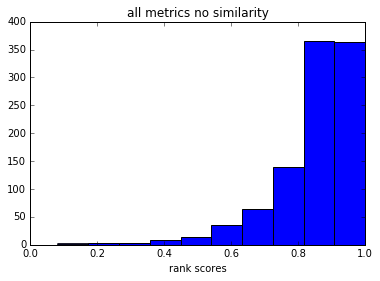

In [58]:
results.loc['all', :] = [np.mean(test_case_rank_scores_all), False, 'combined']

print_describe(test_case_rank_scores_all)

plt.hist(test_case_rank_scores_all)
plt.xlabel('rank scores')
plt.title('all metrics no similarity')

# indegree (no similarity)

In [16]:
columns_to_use = ['indegree']

LogReg = fit_logistic_regression(experiment_data_dir, columns_to_use)

In [17]:
test_case_rank_scores_indeg = compute_ranking_metrics_LR(G, LogReg, columns_to_use, experiment_data_dir,
                                                               active_years, R, seed=seed_ranking, print_progress=True)

(1/1000) at 16:57:15
(2/1000) at 16:57:16
(4/1000) at 16:57:16
(8/1000) at 16:57:17
(16/1000) at 16:57:19
(32/1000) at 16:57:23
(64/1000) at 16:57:29
(128/1000) at 16:57:42
(256/1000) at 16:58:04
(512/1000) at 16:58:55


nobs: 1000
mean: 0.666
median: 0.703
min: 0.001
max: 1.000
std: 0.171
unique values 998


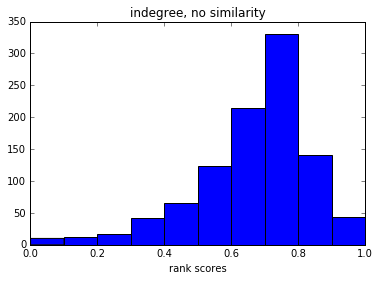

In [59]:
results.loc['indeg', :] = [np.mean(test_case_rank_scores_indeg), False, 'indegree']

print_describe(test_case_rank_scores_indeg)

plt.hist(test_case_rank_scores_indeg)
plt.xlabel('rank scores')
plt.title('indegree, no similarity')

# s_pagerank (no similarity)

In [19]:
columns_to_use = ['s_pagerank']

LogReg = fit_logistic_regression(experiment_data_dir, columns_to_use)

In [20]:
test_case_rank_scores_pr = compute_ranking_metrics_LR(G, LogReg, columns_to_use, experiment_data_dir,
                                                               active_years, R, seed=seed_ranking, print_progress=True)

(1/1000) at 17:00:39
(2/1000) at 17:00:39
(4/1000) at 17:00:40
(8/1000) at 17:00:41
(16/1000) at 17:00:43
(32/1000) at 17:00:47
(64/1000) at 17:00:56
(128/1000) at 17:01:08
(256/1000) at 17:01:30
(512/1000) at 17:02:18


nobs: 1000
mean: 0.582
median: 0.593
min: 0.001
max: 0.999
std: 0.152
unique values 998


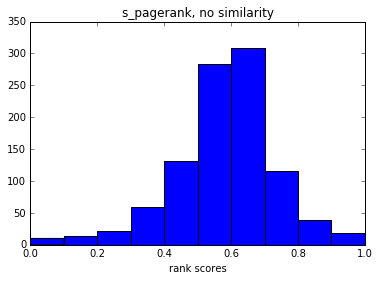

In [60]:
results.loc['s_pagerank', :] = [np.mean(test_case_rank_scores_pr), False, 'pagerank']

print_describe(test_case_rank_scores_pr)

plt.hist(test_case_rank_scores_pr)
plt.xlabel('rank scores')
plt.title('s_pagerank, no similarity')

# hubs (no similarity)

In [28]:
columns_to_use = ['hubs']

LogReg = fit_logistic_regression(experiment_data_dir, columns_to_use)

In [29]:
test_case_rank_scores_hubs = compute_ranking_metrics_LR(G, LogReg, columns_to_use, experiment_data_dir,
                                                               active_years, R, seed=seed_ranking, print_progress=True)

(1/1000) at 18:18:12
(2/1000) at 18:18:12
(4/1000) at 18:18:13
(8/1000) at 18:18:14
(16/1000) at 18:18:18
(32/1000) at 18:18:25
(64/1000) at 18:18:35
(128/1000) at 18:18:50
(256/1000) at 18:19:14
(512/1000) at 18:20:02


nobs: 1000
mean: 0.780
median: 0.814
min: 0.004
max: 1.000
std: 0.162
unique values 998


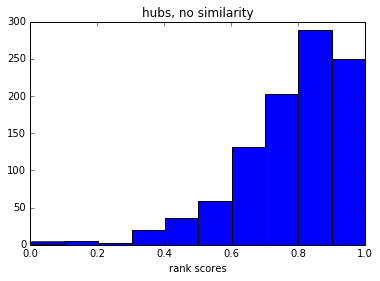

In [61]:
results.loc['hubs', :] = [np.mean(test_case_rank_scores_hubs), False, 'hubs']

print_describe(test_case_rank_scores_hubs)

plt.hist(test_case_rank_scores_hubs)
plt.xlabel('rank scores')
plt.title('hubs, no similarity')

# all metrics with similarity

In [53]:
columns_to_use = ['indegree', 'decayed_indegree', 's_pagerank', 'hubs', 'age', 'similarity']
LogReg = fit_logistic_regression(experiment_data_dir, columns_to_use)

In [54]:
test_case_rank_scores_allsim = compute_ranking_metrics_LR(G, LogReg, columns_to_use, experiment_data_dir,
                                                               active_years, R, seed=seed_ranking, print_progress=True)

(1/1000) at 21:20:32
(2/1000) at 21:20:33
(4/1000) at 21:20:33
(8/1000) at 21:20:35
(16/1000) at 21:20:38
(32/1000) at 21:20:44
(64/1000) at 21:20:56
(128/1000) at 21:21:25
(256/1000) at 21:22:05
(512/1000) at 21:23:37


nobs: 1000
mean: 0.872
median: 0.918
min: 0.071
max: 1.000
std: 0.124
unique values 1000


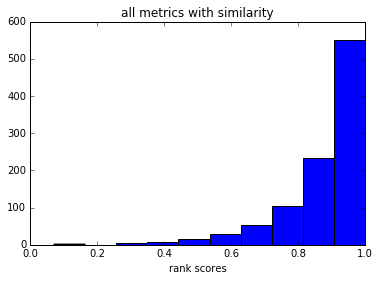

In [62]:
results.loc['all_sim', :] = [np.mean(test_case_rank_scores_allsim), True, 'combined']

print_describe(test_case_rank_scores_allsim)

plt.hist(test_case_rank_scores_allsim)
plt.xlabel('rank scores')
plt.title('all metrics with similarity')

# indegree with similarity

In [22]:
columns_to_use = ['indegree', 'similarity']

LogReg = fit_logistic_regression(experiment_data_dir, columns_to_use)

In [23]:
test_case_rank_scores_indegsim = compute_ranking_metrics_LR(G, LogReg, columns_to_use, experiment_data_dir,
                                                               active_years, R, seed=seed_ranking,print_progress=True)

(1/1000) at 17:14:30
(2/1000) at 17:14:32
(4/1000) at 17:14:33
(8/1000) at 17:14:34
(16/1000) at 17:14:38
(32/1000) at 17:14:44
(64/1000) at 17:14:54
(128/1000) at 17:15:19
(256/1000) at 17:16:00
(512/1000) at 17:17:24


nobs: 1000
mean: 0.843
median: 0.866
min: 0.139
max: 1.000
std: 0.120
unique values 1000


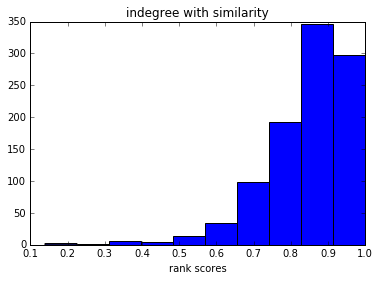

In [63]:
results.loc['indeg_sim', :] = [np.mean(test_case_rank_scores_indegsim), True, 'indegree']


print_describe(test_case_rank_scores_indegsim)

plt.hist(test_case_rank_scores_indegsim)
plt.xlabel('rank scores')
plt.title('indegree with similarity')

# s_pagerank with similarity

In [25]:
columns_to_use = ['s_pagerank', 'similarity']

LogReg = fit_logistic_regression(experiment_data_dir, columns_to_use)

In [26]:
test_case_rank_scores_prsim = compute_ranking_metrics_LR(G, LogReg, columns_to_use, experiment_data_dir,
                                                   active_years, R, seed=seed_ranking)


nobs: 1000
mean: 0.846
median: 0.867
min: 0.134
max: 1.000
std: 0.128
unique values 998


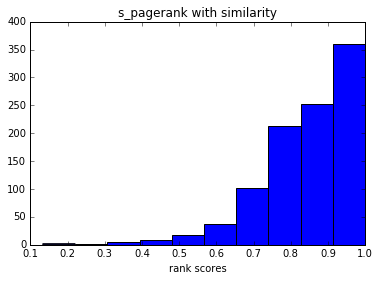

In [64]:
results.loc['s_pagerank_sim', :] = [np.mean(test_case_rank_scores_prsim), True, 'pagerank']

print_describe(test_case_rank_scores_prsim)

plt.hist(test_case_rank_scores_prsim)
plt.xlabel('rank scores')
plt.title('s_pagerank with similarity')

# hubs with similarity

In [31]:
columns_to_use = ['hubs', 'similarity']

LogReg = fit_logistic_regression(experiment_data_dir, columns_to_use)

In [32]:
test_case_rank_scores_hubssim = compute_ranking_metrics_LR(G, LogReg, columns_to_use, experiment_data_dir,
                                                   active_years, R, seed=seed_ranking)


nobs: 1000
mean: 0.862
median: 0.893
min: 0.135
max: 1.000
std: 0.122
unique values 1000


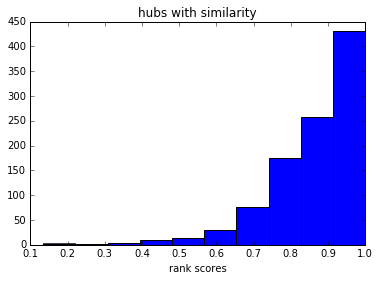

In [65]:
results.loc['hubs_sim', :] = [np.mean(test_case_rank_scores_hubssim), True, 'hubs']


print_describe(test_case_rank_scores_hubssim)

plt.hist(test_case_rank_scores_hubssim)
plt.xlabel('rank scores')
plt.title('hubs with similarity')

# results

In [81]:
# stupid formatting
results['similarity'] = results['similarity'].astype(np.bool)


results

,mean_score,similarity,method
all,0.845921,False,combined
indeg,0.665713,False,indegree
s_pagerank,0.582087,False,pagerank
hubs,0.779811,False,hubs
all_sim,0.871801,True,combined
indeg_sim,0.843375,True,indegree
s_pagerank_sim,0.846453,True,pagerank
hubs_sim,0.862307,True,hubs


In [90]:
# without similarity
results[~results['similarity']].sort_values(by='mean_score', ascending=False)

,mean_score,similarity,method
all,0.845921,False,combined
hubs,0.779811,False,hubs
indeg,0.665713,False,indegree
s_pagerank,0.582087,False,pagerank


In [92]:
# with similarity
results[results['similarity']].sort_values(by='mean_score', ascending=False)

,mean_score,similarity,method
all_sim,0.871801,True,combined
hubs_sim,0.862307,True,hubs
s_pagerank_sim,0.846453,True,pagerank
indeg_sim,0.843375,True,indegree


# surgery